<a href="https://colab.research.google.com/github/nohjuhyeon/AI_L.K.J/blob/main/docs/quests/CDAs/CDA_continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## matplotlib 시각화

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## load dataset

In [20]:
import pandas as pd
df_fruit = pd.read_csv("/content/fruitstore_saleshistory.csv")


In [43]:
df_fruit['공급일자'] = pd.to_datetime(df_fruit['공급일자'],format='%Y-%m-%d')
df_fruit['공급일자_week'] = df_fruit['공급일자'].dt.isocalendar().week
df_fruit['구매일자'] = df_fruit['공급일자'].astype(str) +' '+ df_fruit['구매시각']
df_fruit.query('회원번호 == 18942336')

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,...,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각,공급일자_week,구매일자
29647,2018-01-09,화,1,2,18942336,정상회원,간식,밀가공,만두,고기만두(500g),...,성복동,여,47.0,40대,10338,매장C,NaN,19:26,2,2018-01-09 19:26
30784,2018-01-09,화,1,2,18942336,정상회원,축산물,육가공,돈가스/분쇄가공,치즈돈가스(300g),...,성복동,여,47.0,40대,11678,매장C,NaN,19:26,2,2018-01-09 19:26
32926,2018-01-09,화,1,2,18942336,정상회원,축산물,닭/오리,무항생제닭,백숙용통닭(0.85~1kg/국내산),...,성복동,여,47.0,40대,14167,매장C,NaN,19:26,2,2018-01-09 19:26
32927,2018-01-09,화,1,2,18942336,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,...,성복동,여,47.0,40대,4403,매장C,NaN,19:26,2,2018-01-09 19:26
66380,2018-01-18,목,1,3,18942336,정상회원,채소,양념채소,대파,대파(500g),...,성복동,여,47.0,40대,4020,매장D,NaN,11:29,3,2018-01-18 11:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595251,2018-06-04,월,6,23,18942336,정상회원,축산물,유제품,아이스크림,유기농아이스크림(블루베리맛),...,성복동,여,47.0,40대,17038,매장C,NaN,19:54,23,2018-06-04 19:54
596538,2018-06-04,월,6,23,18942336,정상회원,간식,과자,스낵,오곡퐁(150g),...,성복동,여,47.0,40대,4977,매장C,NaN,19:54,23,2018-06-04 19:54
597194,2018-06-04,월,6,23,18942336,정상회원,채소,과일채소,수박,수박(대:7~8kg),...,성복동,여,47.0,40대,35800,매장C,NaN,19:54,23,2018-06-04 19:54
598429,2018-06-04,월,6,23,18942336,정상회원,음료,음료,푸딩,한입쏙쏙젤리(450g),...,성복동,여,47.0,40대,10816,매장C,NaN,19:54,23,2018-06-04 19:54


In [63]:
df_fruit_order_date = df_fruit.drop_duplicates(subset=['구매일자','회원번호'], keep='first')
df_fruit_order_date['구매_월'] =  df_fruit_order_date['공급일자'].dt.year.astype(str) + '-' + df_fruit_order_date['공급일자'].dt.month.astype('str')
df_fruit_order_date

<ipython-input-63-b1101e5d564a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fruit_order_date['구매_월'] =  df_fruit_order_date['공급일자'].dt.year.astype(str) + '-' + df_fruit_order_date['공급일자'].dt.month.astype('str')


,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,...,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각,공급일자_week,구매일자,구매_월
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),...,여,45.0,40대,22207,매장C,NaN,10:04,1,2018-01-02 10:04,2018-1
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),...,여,36.0,30대이하,4977,매장C,NaN,10:05,1,2018-01-02 10:05,2018-1
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),...,여,36.0,30대이하,766,매장C,NaN,10:08,1,2018-01-02 10:08,2018-1
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,...,여,34.0,30대이하,4403,매장C,NaN,10:09,1,2018-01-02 10:09,2018-1
5,2018-01-02,화,1,1,716128320,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),...,여,51.0,50대,7083,매장C,NaN,10:10,1,2018-01-02 10:10,2018-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705354,2018-06-30,토,6,26,1553271552,정상회원,과실,과일,황매실,황매실(남고)/유(5kg),...,여,45.0,40대,111036,매장D,NaN,12:49,26,2018-06-30 12:49,2018-6
705415,2018-06-30,토,6,26,1515509376,정상회원,축산물,알,유정란,유정란/매장용(15알/국내산),...,여,73.0,70대이상,10338,매장B,NaN,11:43,26,2018-06-30 11:43,2018-6
705429,2018-06-30,토,6,26,606984384,정상회원,과실,과일,산딸기,냉동산딸기(250g),...,여,51.0,50대,35608,매장B,NaN,19:34,26,2018-06-30 19:34,2018-6
705469,2018-06-30,토,6,26,639109888,정상회원,주곡,멥쌀,멥쌀,백미/유(8kg)-매장용,...,여,40.0,40대,58773,매장B,NaN,15:49,26,2018-06-30 15:49,2018-6


In [68]:
df_fruit_order_month = df_fruit_order_date.drop_duplicates(subset=['구매_월','회원번호'], keep='first')
df_fruit_order_month

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,...,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각,공급일자_week,구매일자,구매_월
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),...,여,45.0,40대,22207,매장C,NaN,10:04,1,2018-01-02 10:04,2018-1
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),...,여,36.0,30대이하,4977,매장C,NaN,10:05,1,2018-01-02 10:05,2018-1
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),...,여,36.0,30대이하,766,매장C,NaN,10:08,1,2018-01-02 10:08,2018-1
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,...,여,34.0,30대이하,4403,매장C,NaN,10:09,1,2018-01-02 10:09,2018-1
5,2018-01-02,화,1,1,716128320,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),...,여,51.0,50대,7083,매장C,NaN,10:10,1,2018-01-02 10:10,2018-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704215,2018-06-30,토,6,26,245621184,정상회원,간식,잼/병조림/기타,잼,발효가시복분자잼(300g),...,여,43.0,40대,8041,매장B,NaN,15:11,26,2018-06-30 15:11,2018-6
704443,2018-06-30,토,6,26,1540569088,정상회원,축산물,중량(정육),돼지(중량),찜갈비-성남용인,...,여,41.0,40대,61028,매장C,NaN,10:49,26,2018-06-30 10:49,2018-6
704507,2018-06-30,토,6,26,273513152,정상회원,반찬,두부/유부,두부,두부(1모:420g),...,여,75.0,70대이상,3733,매장C,NaN,13:46,26,2018-06-30 13:46,2018-6
704551,2018-06-30,토,6,26,1342281472,정상회원,축산물,중량(정육),돼지(중량),앞다리(무항생제)-성남용인,...,여,54.0,50대,17436,매장C,NaN,12:11,26,2018-06-30 12:11,2018-6


In [ ]:
df_fruit_category_pivot_date = pd.pivot_table(data = df_fruit, index='회원번호',values=['구매금액'], aggfunc='sum')

In [25]:
df_fruit_order_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78351 entries, 0 to 705469
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   공급일자       78351 non-null  datetime64[ns]
 1   요일         78351 non-null  object        
 2   공급월        78351 non-null  int64         
 3   공급주차       78351 non-null  int64         
 4   회원번호       78351 non-null  int64         
 5   조합원상태      78351 non-null  object        
 6   물품대분류      78351 non-null  object        
 7   물품중분류      78351 non-null  object        
 8   물품소분류      78351 non-null  object        
 9   물품명        78351 non-null  object        
 10  구매수량       78351 non-null  float64       
 11  주소-구       78351 non-null  object        
 12  주소-동       78351 non-null  object        
 13  성별         78350 non-null  object        
 14  연령         78349 non-null  float64       
 15  연령대        78349 non-null  object        
 16  구매금액       78351 non-null  int64       

In [73]:
df_fruit_category_pivot_month = pd.pivot_table(data = df_fruit_order_month, index='회원번호',values=['구매_월'], aggfunc='count')
df_fruit_category_pivot_month.sort_values(by='회원번호')

,구매_월
회원번호,
18764160,5
18792000,1
18942336,4
19391488,1
19627200,6
...,...
1607535424,1
1607672768,1
1670400000,6


In [72]:
df_fruit_category_pivot_price = pd.pivot_table(data = df_fruit, index='회원번호',values=['구매금액'], aggfunc='sum')
df_fruit_category_pivot_price.sort_values(by='회원번호')

,구매금액
회원번호,
18764160,604284
18792000,70642
18942336,1010616
19391488,3159
19627200,4101241
...,...
1607535424,13784
1607672768,121949
1670400000,38171716


In [48]:
df_fruit_category_pivot_order = pd.pivot_table(data = df_fruit_order_date, index='회원번호',values=['구매일자'], aggfunc='count')
df_fruit_category_pivot_order.sort_values(by='회원번호',ascending=True)

,구매일자
회원번호,
18764160,16
18792000,1
18942336,7
19391488,1
19627200,53
...,...
1607535424,1
1607672768,1
1670400000,1608


In [80]:
df_fruit_pivot_table = pd.concat([df_fruit_category_pivot_price, df_fruit_category_pivot_order,df_fruit_category_pivot_month], axis=1)
df_fruit_pivot_table['월별 방문횟수'] = df_fruit_pivot_table['구매일자']/df_fruit_pivot_table['구매_월']
df_fruit_pivot_table['평균거래가치'] = df_fruit_pivot_table['구매금액']/df_fruit_pivot_table['구매일자']
df_fruit_pivot_table.sort_values('구매일자',ascending = False)

,구매금액,구매일자,구매_월,월별 방문횟수,평균거래가치
회원번호,,,,,
1670400000,38171716,1608,6,268.000000,23738.629353
762476352,9705050,229,6,38.166667,42380.131004
389065856,8840414,214,6,35.666667,41310.345794
86983296,11228791,208,6,34.666667,53984.572115
38959296,6138068,205,6,34.166667,29941.795122
...,...,...,...,...,...
309510272,12539,1,1,1.000000,12539.000000
1218116928,31779,1,1,1.000000,31779.000000
762209088,160811,1,1,1.000000,160811.000000


In [78]:
df_fruit_pivot_table['월별 방문횟수'].describe()

count    11202.000000
mean         2.796975
std          3.943542
min          1.000000
25%          1.000000
50%          1.750000
75%          3.166667
max        268.000000
Name: 월별 방문횟수, dtype: float64

## 분석 내용 : 고객 충성도 점수(X)가 평균 거래 가치(Y)를 예측합니까?
- 귀무가설 : 고객 충성도에 따라 평균 거래 가치 변화가 없다.
- 대립 가설 : 고객 충성도에 따라 평균 거래 가치 변화가 있다.


## 정규분포 확인 : 연속형
- 월별 방문횟수, 평균 거래 가치 둘 다 정규분포 : pearsonr

<Axes: xlabel='월별 방문횟수', ylabel='Count'>

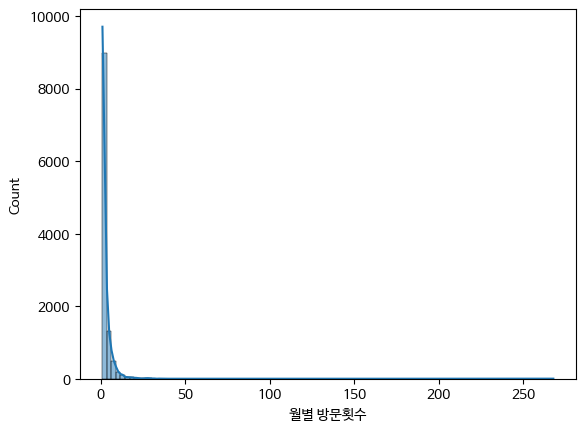

In [82]:
sns.histplot(data=df_fruit_pivot_table['월별 방문횟수'], bins = 100,kde=True)

In [83]:
import scipy.stats as stats

In [84]:
statistic,critical_values,significance_level = stats.anderson(df_fruit_pivot_table['월별 방문횟수'])
print(statistic)              # 검정 통계량, 비교 기준 없어 현재 사용 불가
print(critical_values)        # 0.05의 값이 0.05보다 크면 귀무가설이기 때문에 정규분포/0.05보다 작을 경우 대립가설이기 때문에 비정규분포
print(significance_level)     # 유의 수준 단계 [15.  10.   5.   2.5  1. ] ->[15%  10%   5%   2.5%  1% ]

1481.9316719311773
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


<Axes: xlabel='평균거래가치', ylabel='Count'>

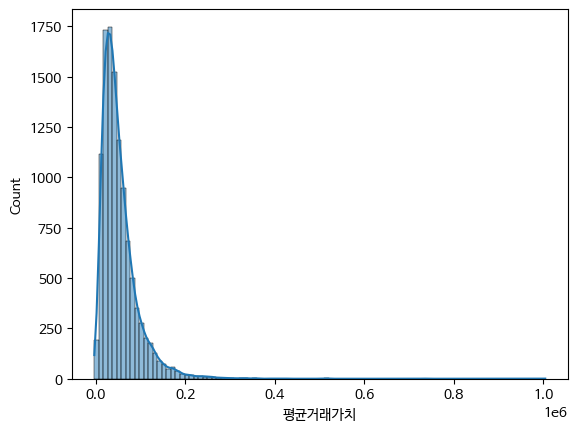

In [85]:
sns.histplot(data=df_fruit_pivot_table['평균거래가치'], bins = 100,kde=True)

In [86]:
statistic,critical_values,significance_level = stats.anderson(df_fruit_pivot_table['평균거래가치'])
print(statistic)              # 검정 통계량, 비교 기준 없어 현재 사용 불가
print(critical_values)        # 0.05의 값이 0.05보다 크면 귀무가설이기 때문에 정규분포/0.05보다 작을 경우 대립가설이기 때문에 비정규분포
print(significance_level)     # 유의 수준 단계 [15.  10.   5.   2.5  1. ] ->[15%  10%   5%   2.5%  1% ]

483.7770362634892
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


## pearsonr

In [87]:
import scipy.stats as stats
stats.pearsonr(df_fruit_pivot_table['평균거래가치'],df_fruit_pivot_table['월별 방문횟수'])

PearsonRResult(statistic=-0.01089861884566138, pvalue=0.24874217555029565)

In [90]:
df_average_value_month_count = (df_fruit_pivot_table[['평균거래가치','월별 방문횟수']])
df_average_value_month_count.corr()

,평균거래가치,월별 방문횟수
평균거래가치,1.000000,-0.010899
월별 방문횟수,-0.010899,1.000000


## 분석 결과
- 통계 결론 : 귀무가설 성립, 상관계수가 반비례 관계
- 사실 결론 : 월별 방문횟수에 따라 평균거래가치의 변화가 없다.